In [1]:
import time, json, requests
import pandas as pd
import datetime

# 每日疫情数据

In [2]:
#download data
def downloadDailyData():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    return data

In [18]:
def downloadDailyDataOther():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_other&callback='
    data = json.loads(requests.get(url=url).json()['data'])
    return data

In [3]:
# decode area data to data frame
def getAreaDataFrame(response_data):
    area_tree = response_data['areaTree']
    df_area = pd.DataFrame(columns=['Country','Province','City','AllOrToday','confirm','suspect','dead','heal'])
    for country in area_tree:
        df_area = df_area.append({'Country':country['name'],
                   'Province':'',
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':country['total']['confirm'],
                   'suspect':country['total']['suspect'],
                   'dead':country['total']['dead'],
                   'heal':country['total']['heal']
                  },ignore_index=True)
        if(country['today']['isUpdated'] == True):
            df_area = df_area.append({'Country':country['name'],
                       'Province':'',
                       'City':'',               
                       'AllOrToday':'Today',
                       'confirm':country['today']['confirm'],
                       #'suspect':country['today']['suspect'],
                       #'dead':country['today']['dead'],
                       #'heal':country['today']['heal']
                      },ignore_index=True)
        if 'children' in country:
            country_tree = country['children']
            for province in country_tree:
                #print('pv:{}'.format(province['name']))
                df_area = df_area.append({'Country':country['name'],
                   'Province':province['name'],
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':province['total']['confirm'],
                   'suspect':province['total']['suspect'],
                   'dead':province['total']['dead'],
                   'heal':province['total']['heal']
                  },ignore_index=True)
                if(province['today']['isUpdated'] == True):
                    df_area = df_area.append({'Country':country['name'],
                       'Province':province['name'],
                       'City':'',               
                       'AllOrToday':'Today',
                       'confirm':province['today']['confirm'],
                       #'suspect':province['today']['suspect'],
                       #'dead':province['today']['dead'],
                       #'heal':province['today']['heal']
                      },ignore_index=True)
                if 'children' in province:
                    province_tree = province['children']
                    for city in province_tree:
                        df_area = df_area.append({'Country':country['name'],
                           'Province':province['name'],
                           'City':city['name'],               
                           'AllOrToday':'All',
                           'confirm':city['total']['confirm'],
                           'suspect':city['total']['suspect'],
                           'dead':city['total']['dead'],
                           'heal':city['total']['heal']
                          },ignore_index=True)
                        if(city['today']['isUpdated'] == True):
                            df_area = df_area.append({'Country':country['name'],
                               'Province':province['name'],
                               'City':city['name'],               
                               'AllOrToday':'Today',
                               'confirm':city['today']['confirm'],
                               #'suspect':city['today']['suspect'],
                               #'dead':city['today']['dead'],
                               #'heal':city['today']['heal']
                              },ignore_index=True)
    return df_area

In [4]:
def chinaSummary(data):
    data['chinaTotal']['AllOrToday'] = 'All'
    data['chinaAdd']['AllOrToday'] = 'Today'
    china_summary = pd.DataFrame.from_records([data['chinaTotal'],data['chinaAdd']])
    return china_summary

In [19]:
def getHistory(data):
    china_history_sum = pd.DataFrame.from_records(data['chinaDayList'])
    china_history_add = pd.DataFrame.from_records(data['chinaDayAddList'])
    daily_history_add = pd.DataFrame.from_records(data['dailyNewAddHistory'])
    daily_history_sum = pd.DataFrame.from_records(data['dailyHistory'])
    return china_history_sum, china_history_add,daily_history_add,daily_history_sum

In [26]:
def saveAll(data):
    last_time = data['lastUpdateTime'].replace(':','-')
    print(last_time)
    area_df = getAreaDataFrame(data)
    area_df.to_csv('data/infections/area_{}.csv'.format(last_time),index=False)
    summary = chinaSummary(data)
    summary.to_csv('data/infections/summary_{}.csv'.format(last_time),index=False)
    

In [30]:
def saveAllOther(data):
    history_sum,history_add,daily_add,daily_sum = getHistory(data)

    history_sum.to_csv('data/infections/history_sum.csv',index=False)
    history_add.to_csv('data/infections/history_add.csv',index=False)
    daily_sum.to_csv('data/infections/daily_sum.csv',index=False)
    daily_add.to_csv('data/infections/daily_add.csv',index=False)

In [34]:
# Run this function daily to save data
def updateNow():
    data = downloadDailyData()
    saveAll(data)
    dataother = downloadDailyDataOther()
    saveAllOther(dataother)
    return data,dataother

In [109]:
data,dataother = updateNow()

2020-02-29 02-05-52


In [110]:
df_area = getAreaDataFrame(data)

# 数据查询

In [111]:
#今日概览
chinaSummary(data)

,confirm,heal,dead,nowConfirm,suspect,nowSevere,AllOrToday
0,78962,36215,2791,39956,2308,7952,All
1,3,58,0,-55,0,0,Today


In [112]:
#全球数据： 
df_area[(df_area['Province']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,78962,2308,2791,36215
468,韩国,,,All,1766,0,13,24
469,钻石号邮轮,,,All,705,0,4,0
470,意大利,,,All,653,0,17,45
471,伊朗,,,All,270,0,26,49
472,日本本土,,,All,207,0,1,1
473,新加坡,,,All,96,0,0,66
474,美国,,,All,60,0,0,3
475,德国,,,All,48,0,0,14
476,科威特,,,All,43,0,0,0


In [113]:
#全国数据： 
df_area[(df_area['Country']=='中国')& (df_area['City']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,78962,2308,2791,36215
2,中国,湖北,,All,65914,0,2682,26403
21,中国,广东,,All,1348,0,7,919
43,中国,河南,,All,1272,0,20,1103
63,中国,浙江,,All,1205,0,1,943
76,中国,湖南,,All,1017,0,4,820
91,中国,安徽,,All,990,0,6,842
108,中国,江西,,All,935,0,1,790
121,中国,山东,,All,756,0,6,404
137,中国,江苏,,All,631,0,0,506


In [114]:
#各省数据： 
df_area[(df_area['Province']=='北京')& (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
227,中国,北京,,All,410,0,7,257
228,中国,北京,朝阳,All,70,0,0,0
229,中国,北京,海淀,All,62,0,0,0
230,中国,北京,西城,All,53,0,0,0
231,中国,北京,丰台,All,42,0,0,0
232,中国,北京,大兴,All,39,0,0,0
233,中国,北京,昌平,All,29,0,0,0
234,中国,北京,外地来京,All,25,0,0,0
235,中国,北京,通州,All,19,0,0,0
236,中国,北京,房山,All,16,0,0,0


In [115]:
#新增数据： All --> Today
df_area[(df_area['AllOrToday']=='Today')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
1,中国,,,Today,3,NaN,NaN,NaN
375,中国,山西,,Today,0,NaN,NaN,NaN


In [116]:
#累计确诊历史
getHistory(dataother)[0]

,confirm,suspect,dead,heal,nowConfirm,nowSevere,deadRate,healRate,date
0,41,0,1,0,0,0,2.4,0.0,01.13
1,41,0,1,0,0,0,2.4,0.0,01.14
2,41,0,2,5,0,0,4.9,12.2,01.15
3,45,0,2,8,0,0,4.4,17.8,01.16
4,62,0,2,12,0,0,3.2,19.4,01.17
5,198,0,3,17,0,0,1.5,8.6,01.18
6,275,0,4,18,0,0,1.5,6.5,01.19
7,291,54,6,25,291,0,2.1,8.6,01.20
8,440,37,9,25,431,0,2.0,5.7,01.21
9,574,393,17,25,557,0,3.0,4.4,01.22


In [117]:
#新增确诊历史
getHistory(dataother)[1]

,confirm,suspect,dead,heal,deadRate,healRate,date
0,77,27,0,0,0.0,0.0,01.20
1,149,53,3,0,2.0,0.0,01.21
2,131,257,8,0,6.1,0.0,01.22
3,259,680,8,6,3.1,2.3,01.23
4,444,1118,16,3,3.6,0.7,01.24
5,688,1309,15,11,2.2,1.6,01.25
6,769,3806,24,2,3.1,0.3,01.26
7,1771,2077,26,9,1.5,0.5,01.27
8,1459,3248,26,43,1.8,2.9,01.28
9,1737,4148,38,21,2.2,1.2,01.29


In [118]:
getHistory(dataother)[2]

,date,hubei,country,notHubei
0,01.20,72,77,5
1,01.21,105,149,44
2,01.22,69,131,62
3,01.23,105,259,154
4,01.24,180,444,264
5,01.25,323,688,365
6,01.26,371,769,398
7,01.27,1291,1771,480
8,01.28,840,1459,619
9,01.29,1032,1737,705


In [119]:
getHistory(dataother)[3]

,date,hubei,notHubei,country
0,01.20,"{'dead': 6, 'heal': 25, 'nowConfirm': 239, 'de...","{'dead': 0, 'heal': 0, 'nowConfirm': 52, 'dead...","{'dead': 6, 'heal': 25, 'nowConfirm': 291, 'de..."
1,01.23,"{'dead': 24, 'heal': 31, 'nowConfirm': 494, 'd...","{'dead': 1, 'heal': 3, 'nowConfirm': 282, 'dea...","{'dead': 25, 'heal': 34, 'nowConfirm': 776, 'd..."
2,01.24,"{'dead': 39, 'heal': 32, 'nowConfirm': 658, 'd...","{'dead': 2, 'heal': 6, 'nowConfirm': 560, 'dea...","{'dead': 41, 'heal': 38, 'nowConfirm': 1218, '..."
3,01.25,"{'dead': 52, 'heal': 42, 'nowConfirm': 958, 'd...","{'dead': 4, 'heal': 7, 'nowConfirm': 922, 'dea...","{'dead': 56, 'heal': 49, 'nowConfirm': 1880, '..."
4,01.26,"{'dead': 76, 'heal': 44, 'nowConfirm': 1303, '...","{'dead': 4, 'heal': 7, 'nowConfirm': 1327, 'de...","{'dead': 80, 'heal': 51, 'nowConfirm': 2630, '..."
5,01.27,"{'dead': 100, 'heal': 47, 'nowConfirm': 2567, ...","{'dead': 6, 'heal': 13, 'nowConfirm': 1802, 'd...","{'dead': 106, 'heal': 60, 'nowConfirm': 4369, ..."
6,01.28,"{'dead': 125, 'heal': 80, 'nowConfirm': 3349, ...","{'dead': 7, 'heal': 23, 'nowConfirm': 2413, 'd...","{'dead': 132, 'heal': 103, 'nowConfirm': 5762,..."
7,01.29,"{'dead': 162, 'heal': 90, 'nowConfirm': 4334, ...","{'dead': 8, 'heal': 34, 'nowConfirm': 3108, 'd...","{'dead': 170, 'heal': 124, 'nowConfirm': 7442,..."
8,01.30,"{'dead': 204, 'heal': 116, 'nowConfirm': 5486,...","{'dead': 9, 'heal': 55, 'nowConfirm': 3850, 'd...","{'dead': 213, 'heal': 171, 'nowConfirm': 9336,..."
9,01.31,"{'dead': 249, 'heal': 166, 'nowConfirm': 6738,...","{'dead': 10, 'heal': 77, 'nowConfirm': 4581, '...","{'dead': 259, 'heal': 243, 'nowConfirm': 11319..."


# 患者轨迹数据
一个来源：腾讯 https://xw.qq.com/act/fytrace?pgv_ref=txxwapp&ADTAG=txxwapp

In [120]:
def getTrackUrl(page=0,num=1000):
    getTrack_url="https://pacaio.match.qq.com/virus/trackList?page={}&num={}&&callback=".format(page,num)
    return getTrack_url

In [121]:
def getAllTracks():
    endPage = False
    page = 0
    results = []
    while(not endPage):
        data = requests.get(url=getTrackUrl(page,num=10000)).json()['data']
        print('{} records collected in page {}'.format(len(data['list']),page))
        if len(data['list']) == 0:
            break
        print('update at: {}'.format(data['lasttime']))
        results.extend(data['list'])
        page += 1
    return results

In [122]:
results = getAllTracks()
tx_tracks = pd.DataFrame.from_records(results)
tx_tracks.to_csv('data/trips/tx_tracks.csv',index=False)

4964 records collected in page 0
update at: 2020-02-28 12:10:17
0 records collected in page 1


# 患者小区查询
一个来源：腾讯 https://ncov.html5.qq.com/community?channelid=17


In [93]:
def getCommunityDataFrame():
    getCommunity_url = 'https://ncov.html5.qq.com/api/getCommunity?'
    data = requests.get(url=getCommunity_url).json()['community']
    all_records=[]
    for province in data:
        p_data = data[province]
        for city in p_data:
            c_data = p_data[city]
            for district in c_data:        
                d_data = c_data[district]
                for record in d_data:
                    all_records.append(record)                
    df_community = pd.DataFrame.from_records(all_records) 
    return df_community
def saveCommunityData(df_community):
    localtime = datetime.datetime.now().strftime("%y-%m-%d-%H-%M-EST")
    print('update at : {}'.format(localtime))
    timestamp = datetime.datetime.now().strftime("%m-%d")
    df_community['date_saved'] = timestamp
    df_community.to_csv('data/infections/community_{}.csv'.format(timestamp),index=False)
def updateCommunity():
    df = getCommunityDataFrame()
    saveCommunityData(df)

In [123]:
updateCommunity()

update at : 20-02-28-14-14-EST


## 社区数据 in Geopandas

In [95]:
import geopandas as gpd
df = getCommunityDataFrame()
df_geo = df[['province','city','district','full_address','cnt_sum_certain','lng','lat']]
df_geo = df_geo.replace('',0).astype({'cnt_sum_certain':'int32','lng': 'float64','lat': 'float64'})
gdf = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo.lng, df_geo.lat))
gdf

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
0,云南省,玉溪市,红塔区,云南省玉溪市红塔区北城街道大石板社区秧草塘村,2,102.512070,24.464420,POINT (102.51207 24.46442)
1,云南省,玉溪市,红塔区,云南省玉溪市红塔区红塔大道50号华瑞小区,4,102.546300,24.340770,POINT (102.54630 24.34077)
2,云南省,玉溪市,红塔区,云南省玉溪市红塔区玉景苑小区,1,102.544800,24.336069,POINT (102.54480 24.33607)
3,云南省,德宏傣族景颇族自治州,瑞丽市,云南省德宏傣族景颇族自治州瑞丽市五缘玉城小区,1,97.846230,24.024139,POINT (97.84623 24.02414)
4,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇黄包谷地小组,-1,103.079323,25.975559,POINT (103.07932 25.97556)
...,...,...,...,...,...,...,...,...
6360,宁夏回族自治区,吴忠市,同心县,宁夏回族自治区吴忠市同心县韦州镇韦二村,1,106.482361,37.283878,POINT (106.48236 37.28388)
6361,宁夏回族自治区,吴忠市,同心县,宁夏回族自治区吴忠市同心县韦州镇河湾村,1,106.471268,37.286362,POINT (106.47127 37.28636)
6362,宁夏回族自治区,吴忠市,青铜峡市,宁夏回族自治区青铜峡市邵岗镇大沟村,4,105.937157,38.089840,POINT (105.93716 38.08984)
6363,宁夏回族自治区,固原市,隆德县,宁夏回族自治区固原市隆德县观庄乡红堡村,1,106.075958,35.755630,POINT (106.07596 35.75563)


In [224]:
df_geo

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
0,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇瓦房村黄包谷地,1,103.079323,25.975559,POINT (103.07932 25.97556)
1,云南省,昆明市,五华区,云南省昆明市五华区春晖小区,2,102.679253,25.051399,POINT (102.67925 25.05140)
2,云南省,昆明市,五华区,云南省昆明市五华区耀龙康城,1,102.730247,25.098301,POINT (102.73025 25.09830)
3,云南省,昆明市,五华区,云南省昆明市五华区新闻里小区,2,102.692291,25.034473,POINT (102.69229 25.03447)
4,云南省,昆明市,五华区,云南省昆明市五华区西景盛典小区,1,102.707370,25.043470,POINT (102.70737 25.04347)
...,...,...,...,...,...,...,...,...
3225,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区星湖路南一里一巷18号单位住宅,-1,108.343510,22.805840,POINT (108.34351 22.80584)
3226,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区津头街道教育路7号,-1,108.338210,22.802720,POINT (108.33821 22.80272)
3227,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区竹溪大道73号领东尚层,-1,108.373750,22.806080,POINT (108.37375 22.80608)
3228,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区长湖路15号中鼎温馨家园,-1,108.366360,22.826760,POINT (108.36636 22.82676)


In [433]:
m_gdf = gdf.loc[gdf['province']=='北京市']


In [434]:
m_gdf.crs = {'init' :'epsg:4326'}

In [435]:
m_gdf.crs

{'init': 'epsg:4326'}

In [436]:
m_gdf = m_gdf.to_crs(epsg=3857)

## 位置图预览

In [437]:
import contextily as ctx

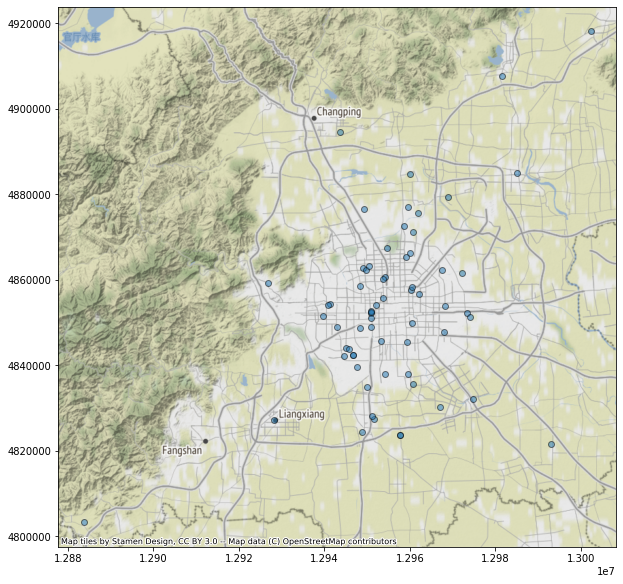

In [438]:
ax = m_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [240]:
fig = ax.get_figure()
fig.savefig('./data/infections/community-beijing-{}.png'.format(timestamp))

## 社区位置增长预览

In [251]:
compare_paths = ['./data/infections/community_20-02-06-13-13-EST.csv',
                 './data/infections/community_20-02-07-16-26-EST.csv']
frames = [ pd.read_csv(f) for f in compare_paths ]
result = pd.concat(frames)
result

In [321]:
target_province = '北京市'
target_city = '' #leave empty if for full province

In [322]:
target_all = result.loc[(result['province']==target_province) & (result['city'].str.contains(target_city))]

In [323]:
target_count = result.loc[(result['province']==target_province) & (result['city']==target_city)].groupby('full_address').count()['date_saved']

In [324]:
m_df = target_all.join(target_count,on='full_address',rsuffix='_c')

In [325]:
m_df = m_df.replace('',0).astype({'cnt_sum_certain':'int32','lng': 'float64','lat': 'float64'})
m_gdf = gpd.GeoDataFrame(
    m_df, geometry=gpd.points_from_xy(m_df.lng, m_df.lat))

m_gdf.crs = {'init' :'epsg:4326'}
m_gdf = m_gdf.to_crs(epsg=3857)

In [326]:
m_gdf = m_gdf.drop_duplicates(subset='full_address',keep='first')

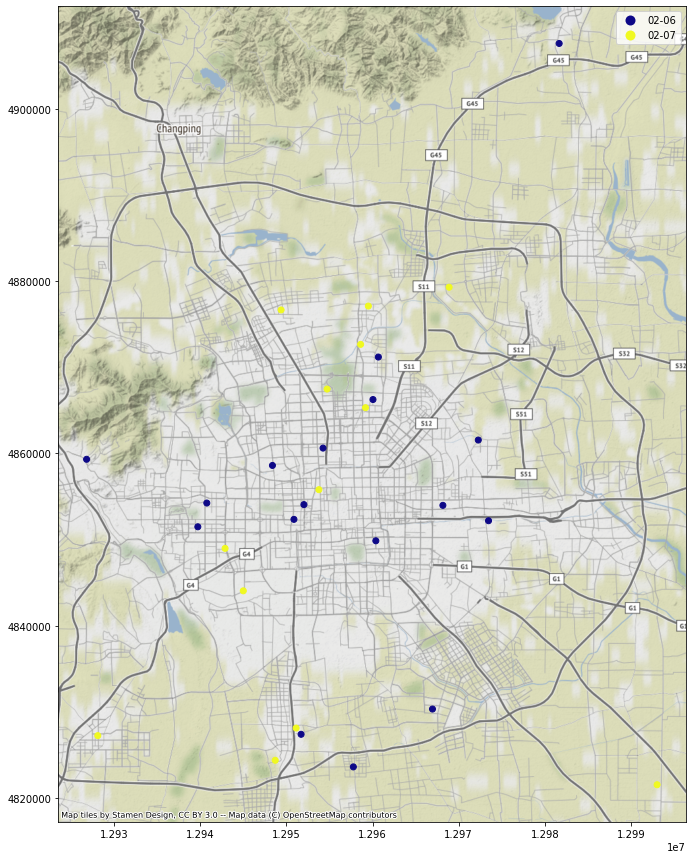

In [327]:
ax = m_gdf.plot(figsize=(20, 15), alpha=1,cmap='plasma', column='date_saved',legend= True)
ctx.add_basemap(ax)

### 保存图片

In [291]:
fig = ax.get_figure()
fig.savefig('./data/infections/community-growth-xuzhou.png')

# 患者同行数据
三个来源：搜狗/人民日报/腾讯

搜狗
https://sa.sogou.com/new-weball/page/sgs/epidemic/yyxw?type_page=yangshi&scene=2&clicktime=1580381964&enterid=1580381964&from=timeline&isappinstalled=0

In [75]:
sogou_trips = pd.read_json('https://hhyfeed.sogoucdn.com/js/common/epidemic-search/main.js')
sogou_trips.to_csv('data/trips/sogou_trips.csv')

人民日报 http://2019ncov.nosugartech.com/search.html?t_date=&t_no=&t_area=

In [76]:
url_trip = 'http://2019ncov.nosugartech.com/data.json?'
json_res = requests.get(url=url_trip).json()['data']
nosugar_trips = pd.DataFrame.from_records(json_res)
nosugar_trips.to_csv('data/trips/nosugar_trips.csv')

腾讯 https://rl.inews.qq.com/h5/trip?from=newsapp

In [77]:
tx_trip_url = 'https://rl.inews.qq.com/taf/travelFront'
json_res = requests.get(url=tx_trip_url).json()['data']['list']
tx_trips = pd.DataFrame.from_records(json_res)
tx_trips.to_csv('data/trips/tx_trips.csv')

In [78]:
tx_trips

,date,start,end,type,no,no_sub,memo,pos_start,pos_end,source,who
0,2020-02-17,,,4,云GV5592,,,商丘,云南,https://news.dahe.cn/2020/02-18/599067.html,大河报·大河客户端
1,2020-02-16,,,1,AQ1275,,九元AQ1275 1人确诊,广州-南昌,兰州,https://www.thepaper.cn/newsDetail_forward_610...,甘肃发布
2,2020-02-16,,,1,AQ1276,,,,江西,https://m.weibo.cn/status/4475442931185101?ope...,甘肃发布
3,2020-02-16,,,2,K9664,,,兰州,长庆桥,https://m.weibo.cn/status/4475461202005549?ope...,中国甘肃网
4,2020-02-15,,,5,西安公交11路,,,五路口站,北新街站,https://m.weibo.cn/1644855075/4472883231391831,新城区疫情防控指挥部办公室
...,...,...,...,...,...,...,...,...,...,...,...
3911,2019-12-27,,,2,K8484,9号车厢,,阜阳,上海,https://m.weibo.cn/status/4474770080884848?ope...,北京晚报北晚新视觉网
3912,2019-12-27,,,2,Z14,10号车厢,,广州东,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型肺炎疫情防控指挥部办公室
3913,2019-12-27,,,2,Z11/Z14,10号车厢,,长沙,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型冠状病毒感染的肺炎疫情防控指挥部办公室
3914,2019-12-25,,,1,KY3004,,,武汉,太原,https://m.weibo.cn/status/4470702092766888?ope...,搜狐新闻
